# Member 1
# Name : Muhammad Muneer
# Roll number: i220526
# Member 2
# Name : Shahzaib
# Roll number: i220444

# PDC Project
# Section : AI-B


# Preprocessing Data Set

In [12]:
import pandas as pd
data = pd.read_csv('/content/pdc_dataset_with_target.csv')
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1


In [13]:
data.isna().sum()

,0
feature_1,2054
feature_2,2050
feature_3,0
feature_4,2054
feature_5,0
feature_6,0
feature_7,2036
target,0


In [14]:
data['feature_1'].mean()

np.float64(29.990843475581585)

### Filling out missing values with mean values in which feature values are missing
* **feature_1**,**feature_2**, **feature_4**, **feature_7** have missing values
* We filled those values with mean of values  

In [15]:
missing_features = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
for i in missing_features:
    data[f'{i}'] = data[f'{i}'].fillna(data[f'{i}'].mean())
print("Testing out are missing values are filled?: ")
for i in missing_features:
    print(data[f'{i}'].count())


Testing out are missing values are filled?: 
41000
41000
41000
41000


In [16]:
data.target.value_counts()

,count
target,
0,24682
1,16318


In [17]:
data.feature_3.value_counts()

,count
feature_3,
A,13704
C,13680
B,13616


## Checking class balance of dataset

target
0    24682
1    16318
Name: count, dtype: int64


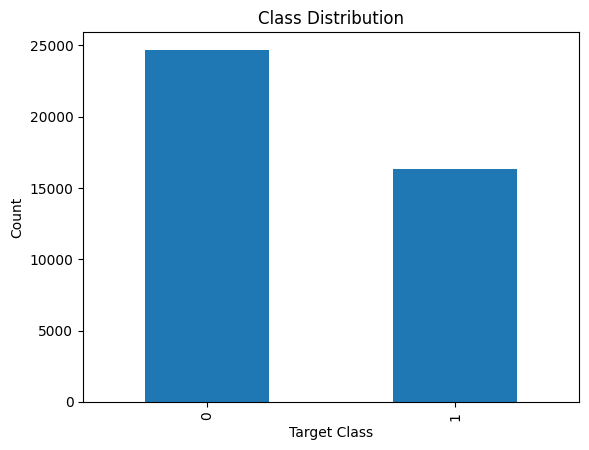

In [18]:
import matplotlib.pyplot as plt


print(data['target'].value_counts())


data['target'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


In [19]:
data.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,B,875.98,No,8,44.160000,0
1,31.330000,39.00000,C,839.91,No,4,13.930000,1
2,23.870000,10.00000,A,1364.70,Yes,4,15.160000,0
3,35.640000,34.00000,C,1462.07,No,4,15.710000,1
4,29.990843,49.43656,C,710.61,No,8,13.770000,1
5,28.000000,99.00000,B,855.72,Yes,3,23.145819,0
6,28.460000,29.00000,C,853.70,No,5,22.650000,0
7,29.210000,59.00000,C,1122.96,No,6,4.750000,0
8,34.030000,18.00000,C,1289.26,Yes,2,24.100000,0
9,42.650000,47.00000,A,1600.50,No,7,2.070000,1


### One hot encoding of feature 3 and feature 5

In [20]:
#one hot encoding of feature 3
# from sklearn.preprocessing import OneHotEncoder
import pandas as pd
encoded_1 = pd.get_dummies(data['feature_3'])
encoded_2 = pd.get_dummies(data['feature_5'])

In [21]:
print(encoded_2)

          No    Yes
0       True  False
1       True  False
2      False   True
3       True  False
4       True  False
...      ...    ...
40995  False   True
40996   True  False
40997  False   True
40998  False   True
40999  False   True

[41000 rows x 2 columns]


###  Importing all neccessary libraries for data standardization, splitting and model training


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import time

### Standardazing and splittng data for training Testing Purposes


In [ ]:

#loading data
df = pd.DataFrame(data)

#encoding categorical variable
#Label Encode 'feature_5' (Yes/No)
le = LabelEncoder()
df['feature_5'] = le.fit_transform(df['feature_5'])

#one hot encoding 'feature_3' (A, B, C)
df = pd.get_dummies(df, columns=['feature_3'], drop_first=True)

#separating features and target
X = df.drop('target', axis=1)
y = df['target']

#standardizing features for model training
scaler = StandardScaler()
X_scaled = X

#train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

#Handle Class Imbalance (if any)
weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}


## Using Logistic Regression

In [ ]:
start_time = time.time()

#Training Logistic Regression model
model = LogisticRegression(C=0.7, class_weight=class_weights, max_iter=1000)
model.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Execution time of model is {lr_time}sec")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Execution time of model is 0.9211857318878174sec
Accuracy: 0.5042276422764228

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.51      0.55      7405
           1       0.40      0.50      0.45      4895

    accuracy                           0.50     12300
   macro avg       0.50      0.50      0.50     12300
weighted avg       0.52      0.50      0.51     12300


Confusion Matrix:
 [[3754 3651]
 [2447 2448]]


In [ ]:
data.shape

(41000, 8)

## Using Desicion Tree

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight



start_time = time.time()
# training using random forest model
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time
# prediction of result
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Execution time serially is {lr_time}sec ")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Execution time serially is 6.4209959506988525sec 
Accuracy: 0.5921951219512195

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.72      7405
           1       0.47      0.18      0.26      4895

    accuracy                           0.59     12300
   macro avg       0.54      0.52      0.49     12300
weighted avg       0.56      0.59      0.54     12300


Confusion Matrix:
 [[6400 1005]
 [4011  884]]


## Using Xgboost

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb
print("\nTraining XGBoost...")

start_time = time.time()

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=weights[0]/weights[1],  #handling imbalance
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,  #avoid warning
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

end_time = time.time()
xgb_time = end_time - start_time

#predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_acc)
print("Execution Time: {:.4f} seconds".format(xgb_time))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))




Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:46:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5995121951219512
Execution Time: 0.3361 seconds

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.60      0.99      0.75      7405
           1       0.36      0.01      0.02      4895

    accuracy                           0.60     12300
   macro avg       0.48      0.50      0.38     12300
weighted avg       0.50      0.60      0.46     12300


Confusion Matrix (XGBoost):
 [[7336   69]
 [4857   38]]


### Training Using neural Network

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Step 1: Load and Preprocess Data
df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
df['feature_5'] = le.fit_transform(df['feature_5'])
df = pd.get_dummies(df, columns=['feature_3'], drop_first=True)

X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Step 2: Define Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

input_size = X_train.shape[1]
model = NeuralNet(input_size)

# Step 3: Define Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 50
start_time = time.time()

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

end_time = time.time()
training_time = end_time - start_time

# Step 5: Evaluate
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred_labels = (y_pred_probs > 0.5).float()

# Convert back to numpy for sklearn metrics
y_pred_np = y_pred_labels.numpy()
y_test_np = y_test_tensor.numpy()

acc = accuracy_score(y_test_np, y_pred_np)

print("\nNeural Network Accuracy:", acc)
print("Execution Time: {:.4f} seconds".format(training_time))
print("\nClassification Report:\n", classification_report(y_test_np, y_pred_np))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_np, y_pred_np))


Epoch [10/50], Loss: 0.6762
Epoch [20/50], Loss: 0.6741
Epoch [30/50], Loss: 0.6724
Epoch [40/50], Loss: 0.6721
Epoch [50/50], Loss: 0.6719

Neural Network Accuracy: 0.601869918699187
Execution Time: 1.4398 seconds

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75      7405
         1.0       0.33      0.00      0.00      4895

    accuracy                           0.60     12300
   macro avg       0.47      0.50      0.38     12300
weighted avg       0.50      0.60      0.45     12300


Confusion Matrix:
 [[7401    4]
 [4893    2]]


# We have tried Traditional ML models with serial model training pipeline now we will try Deep learning model in parallel and serial both ways

In [1]:
import os
import time
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler


# --> CONFIGURE CPU MULTITHREADING
#--> (so PyTorch will parallelize its BLAS/OpenMP kernels across CPU threads)
N_THREADS = 4
os.environ["OMP_NUM_THREADS"]   = str(N_THREADS)
os.environ["MKL_NUM_THREADS"]   = str(N_THREADS)
torch.set_num_threads(N_THREADS)
torch.set_num_interop_threads(N_THREADS)



In [2]:
# --> 1. Data Loading & Preprocessing
def load_and_preprocess(path):
  df = pd.read_csv(path)

  # Fill missing values with column means
  for col in ['feature_1', 'feature_2', 'feature_4', 'feature_7']:
      df[col].fillna(df[col].mean(), inplace=True)

  # Label encode feature_5 (Yes/No)
  df['feature_5'] = LabelEncoder().fit_transform(df['feature_5'])

  # One-hot encode feature_3 (drop first to avoid dummy trap)
  df = pd.get_dummies(df, columns=['feature_3'], drop_first=True)

  # Separate features and target
  X = df.drop('target', axis=1).values.astype(np.float32)
  y = df['target'].values.astype(np.int64)

  # Standardize all features
  X = StandardScaler().fit_transform(X)

  return X, y


In [3]:

# --> 2. Dataset & DataLoader
def make_dataloader(X, y, batch_size, num_workers):
  ds = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))
  loader = DataLoader(ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
  return loader




In [4]:
# --> 3. Model Definition
def build_mlp(input_dim):
  return nn.Sequential(
      nn.Linear(input_dim, 128), nn.ReLU(),    nn.Dropout(0.3),
      nn.Linear(128,      64),  nn.ReLU(),    nn.Dropout(0.3),
      nn.Linear(64,       32),  nn.ReLU(),    nn.Dropout(0.3),
      nn.Linear(32,        1)   # raw logit
  )

# --> 4. Training & Evaluation
def train_epoch(model, loader, criterion, optimizer, device):
  model.train()
  total_loss = 0.0
  for Xb, yb in loader:
    Xb = Xb.to(device)
    yb = yb.to(device).float().unsqueeze(1)
    optimizer.zero_grad()
    logits = model(Xb)
    loss = criterion(logits, yb)
    loss.backward()
    optimizer.step()
    total_loss += loss.item() * Xb.size(0)
  return total_loss / len(loader.dataset)




In [5]:
@torch.no_grad()
def evaluate(model, loader, device):
  model.eval()
  all_preds, all_labels = [], []
  for Xb, yb in loader:
    Xb = Xb.to(device)
    logits = model(Xb)
    probs  = torch.sigmoid(logits).cpu().numpy().flatten()
    preds  = (probs > 0.5).astype(int)
    all_preds.append(preds)
    all_labels.append(yb.numpy())
  y_true = np.concatenate(all_labels)
  y_pred = np.concatenate(all_preds)

  return {
    'accuracy': accuracy_score(y_true, y_pred),
    'f1':       f1_score(y_true, y_pred),
    'cm':       confusion_matrix(y_true, y_pred),
    'report':   classification_report(y_true, y_pred)
  }


In [6]:
# --> 5. Experiment Runner
def run_experiments(path):
  X, y = load_and_preprocess(path)
  split = int(0.7 * len(y))
  X_tr, X_te = X[:split], X[split:]
  y_tr, y_te = y[:split], y[split:]
  input_dim = X_tr.shape[1]
  batch_size = 64

  # build weighted sampler for minority class
  class_counts  = np.bincount(y_tr)
  class_weights = 1.0 / class_counts
  sample_weights= class_weights[y_tr]
  sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
  )

  # compute pos_weight for BCEWithLogitsLoss
  neg, pos = class_counts[0], class_counts[1]
  pos_weight = torch.tensor(neg / pos)

  configs = [
    {'name':'cpu_serial',   'device':'cpu',  'workers':0, 'dp':False},
    {'name':'cpu_parallel', 'device':'cpu',  'workers':4, 'dp':False},
    {'name':'gpu_serial',   'device':'cuda','workers':0, 'dp':False},
    {'name':'gpu_dp',       'device':'cuda','workers':4, 'dp':True},
  ]

  results = []
  for cfg in configs:
    dev = torch.device(cfg['device'] if torch.cuda.is_available() else 'cpu')

    # train loader with sampler (no shuffle)
    train_ds    = TensorDataset(torch.from_numpy(X_tr), torch.from_numpy(y_tr))
    train_loader= DataLoader(train_ds,
                              batch_size=batch_size,
                              sampler=sampler,
                              num_workers=cfg['workers'],
                              pin_memory=True)

    # test loader
    test_loader = make_dataloader(X_te, y_te, batch_size, cfg['workers'])

    # model & loss
    model   = build_mlp(input_dim).to(dev)
    if cfg['dp'] and torch.cuda.device_count()>1:
      model = nn.DataParallel(model)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(dev))

    print(f"\n--> {cfg['name']} on {dev}, workers={cfg['workers']}")
    t0 = time.time()
    # train for 20 epochs
    for ep in range(1, 21):
      loss = train_epoch(model, train_loader, criterion, optimizer, dev)
      print(f"  epoch {ep:2d}/20 — loss: {loss:.4f}")
    dur = time.time() - t0

    m = evaluate(model, test_loader, dev)
    print(f"  {cfg['name']} done in {dur:.1f}s — acc={m['accuracy']:.4f}, f1={m['f1']:.4f}")

    results.append({
        'config':   cfg['name'],
        'time_s':   round(dur, 2),
        'accuracy': m['accuracy'],
        'f1_score': m['f1']
    })

  summary_df = pd.DataFrame(results)
  print("\n****** Summary ******\n", summary_df)
  return summary_df

In [7]:

df_summary = run_experiments('/content/pdc_dataset_with_target.csv')
df_summary.to_csv('experiment_summary_weighted.csv', index=False)



<ipython-input-2-48336b344873>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



--> cpu_serial on cpu, workers=0
  epoch  1/20 — loss: 0.8517
  epoch  2/20 — loss: 0.8499
  epoch  3/20 — loss: 0.8481
  epoch  4/20 — loss: 0.8479
  epoch  5/20 — loss: 0.8491
  epoch  6/20 — loss: 0.8475
  epoch  7/20 — loss: 0.8486
  epoch  8/20 — loss: 0.8485
  epoch  9/20 — loss: 0.8473
  epoch 10/20 — loss: 0.8474
  epoch 11/20 — loss: 0.8478
  epoch 12/20 — loss: 0.8473
  epoch 13/20 — loss: 0.8479
  epoch 14/20 — loss: 0.8474
  epoch 15/20 — loss: 0.8479
  epoch 16/20 — loss: 0.8470
  epoch 17/20 — loss: 0.8477
  epoch 18/20 — loss: 0.8473
  epoch 19/20 — loss: 0.8479
  epoch 20/20 — loss: 0.8467
  cpu_serial done in 35.3s — acc=0.4036, f1=0.5751

--> cpu_parallel on cpu, workers=4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/torch/uti

  epoch  1/20 — loss: 0.8502
  epoch  2/20 — loss: 0.8494
  epoch  3/20 — loss: 0.8480
  epoch  4/20 — loss: 0.8483
  epoch  5/20 — loss: 0.8481
  epoch  6/20 — loss: 0.8469
  epoch  7/20 — loss: 0.8481
  epoch  8/20 — loss: 0.8483
  epoch  9/20 — loss: 0.8473
  epoch 10/20 — loss: 0.8482
  epoch 11/20 — loss: 0.8476
  epoch 12/20 — loss: 0.8475
  epoch 13/20 — loss: 0.8470
  epoch 14/20 — loss: 0.8483
  epoch 15/20 — loss: 0.8482
  epoch 16/20 — loss: 0.8475
  epoch 17/20 — loss: 0.8468
  epoch 18/20 — loss: 0.8464
  epoch 19/20 — loss: 0.8474
  epoch 20/20 — loss: 0.8473


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  cpu_parallel done in 55.0s — acc=0.4036, f1=0.5751

--> gpu_serial on cuda, workers=0
  epoch  1/20 — loss: 0.8512
  epoch  2/20 — loss: 0.8493
  epoch  3/20 — loss: 0.8487
  epoch  4/20 — loss: 0.8477
  epoch  5/20 — loss: 0.8474
  epoch  6/20 — loss: 0.8475
  epoch  7/20 — loss: 0.8481
  epoch  8/20 — loss: 0.8478
  epoch  9/20 — loss: 0.8478
  epoch 10/20 — loss: 0.8478
  epoch 11/20 — loss: 0.8478
  epoch 12/20 — loss: 0.8475
  epoch 13/20 — loss: 0.8467
  epoch 14/20 — loss: 0.8473
  epoch 15/20 — loss: 0.8478
  epoch 16/20 — loss: 0.8475
  epoch 17/20 — loss: 0.8475
  epoch 18/20 — loss: 0.8481
  epoch 19/20 — loss: 0.8477
  epoch 20/20 — loss: 0.8477
  gpu_serial done in 23.8s — acc=0.4036, f1=0.5751

--> gpu_dp on cuda, workers=4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/torch/uti

  epoch  1/20 — loss: 0.8540
  epoch  2/20 — loss: 0.8513
  epoch  3/20 — loss: 0.8498
  epoch  4/20 — loss: 0.8486
  epoch  5/20 — loss: 0.8489
  epoch  6/20 — loss: 0.8480
  epoch  7/20 — loss: 0.8482
  epoch  8/20 — loss: 0.8482
  epoch  9/20 — loss: 0.8483
  epoch 10/20 — loss: 0.8479
  epoch 11/20 — loss: 0.8483
  epoch 12/20 — loss: 0.8477
  epoch 13/20 — loss: 0.8476
  epoch 14/20 — loss: 0.8481
  epoch 15/20 — loss: 0.8480
  epoch 16/20 — loss: 0.8470
  epoch 17/20 — loss: 0.8464
  epoch 18/20 — loss: 0.8462
  epoch 19/20 — loss: 0.8480
  epoch 20/20 — loss: 0.8470
  gpu_dp done in 43.0s — acc=0.4036, f1=0.5751

****** Summary ******
          config  time_s  accuracy  f1_score
0    cpu_serial   35.30  0.403626  0.575119
1  cpu_parallel   54.98  0.403626  0.575119
2    gpu_serial   23.77  0.403626  0.575119
3        gpu_dp   42.95  0.403626  0.575119


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
df_summary

,config,time_s,accuracy,f1_score
0,cpu_serial,35.30,0.403626,0.575119
1,cpu_parallel,54.98,0.403626,0.575119
2,gpu_serial,23.77,0.403626,0.575119
3,gpu_dp,42.95,0.403626,0.575119


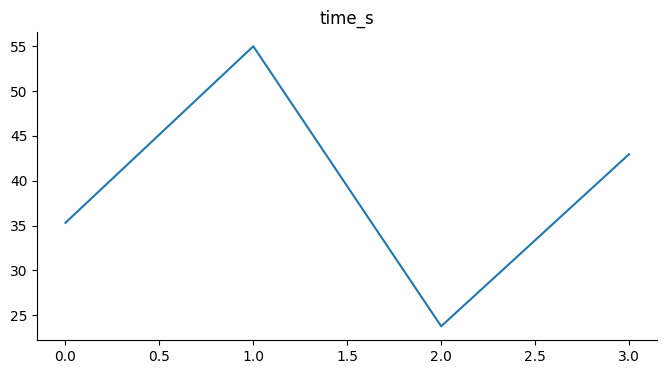

In [9]:
from matplotlib import pyplot as plt
df_summary['time_s'].plot(kind='line', figsize=(8, 4), title='time_s')
plt.gca().spines[['top', 'right']].set_visible(False)